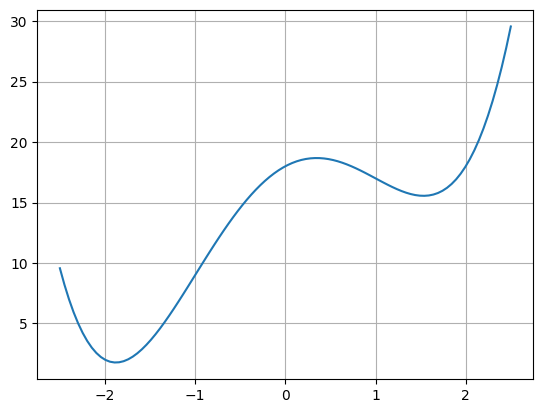

In [1]:
# SOLUTION TO PROBLEM 1
import numpy as np
import matplotlib.pyplot as plt
S = 20 # number of steps
alpha = 0.01 # learning rate
f = lambda x: x**4 - 6*x**2 + 4*x + 18
df = lambda x: 4*x**3 - 12*x + 4
# plot the function:
x_range = np.linspace(-2.5,2.5,100)
plt.plot(x_range, f(x_range))
plt.grid(True)

In [3]:
# approximate local minima are -1.88 (also global) and 1.53
x = np.empty((S+1,))
# initial point:
x[0] = 1
print('>>> Running GD with starting value x =', x[0], 'and learning rate alpha  =', alpha)
for i in range(1,S+1):
    x[i] = x[i-1] - alpha*df(x[i-1])
    print('Step', i, ' x =', x[i], ' f(x) =', f(x[i]))

>>> Running GD with starting value x = 1.0 and learning rate alpha  = 0.01
Step 1  x = 1.04  f(x) = 16.84025856
Step 2  x = 1.0798054400000001  f(x) = 16.682851897094334
Step 3  x = 1.119020840068549  f(x) = 16.530861492173784
Step 4  x = 1.1572534830439267  f(x) = 16.387152244708915
Step 5  x = 1.1941304973887767  f(x) = 16.254162806484764
Step 6  x = 1.229315454262303  f(x) = 16.13373816834498
Step 7  x = 1.262522837530415  f(x) = 16.027028821639956
Step 8  x = 1.2935289442241535  f(x) = 15.93446856222769
Step 9  x = 1.3221782260494936  f(x) = 15.855828153659868
Step 10  x = 1.3483847002782723  f(x) = 15.790328788009905
Step 11  x = 1.372128707840095  f(x) = 15.736791016005489
Step 12  x = 1.3934498428239785  f(x) = 15.693793045012892
Step 13  x = 1.4124372242060033  f(x) = 15.659816283499957
Step 14  x = 1.4292183920198969  f(x) = 15.633363464226218
Step 15  x = 1.4439480114680723  f(x) = 15.613042922596875
Step 16  x = 1.4567973253950453  f(x) = 15.597619534954735
Step 17  x = 1.46

### Problem 2

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error

OLS: test MSE =  1502077.43482159
LASSO: test MSE =  1502356.4555399287


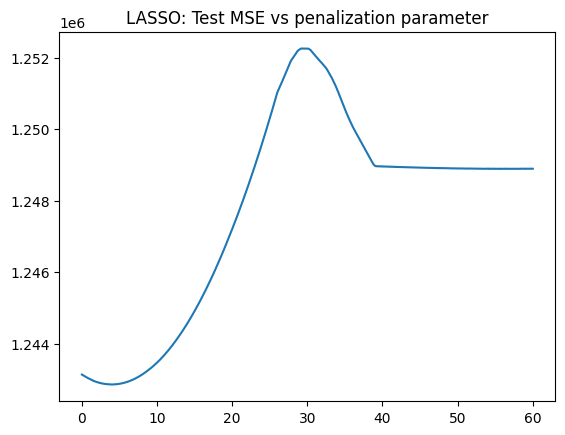

RIDGE: test MSE =  1504969.056013759


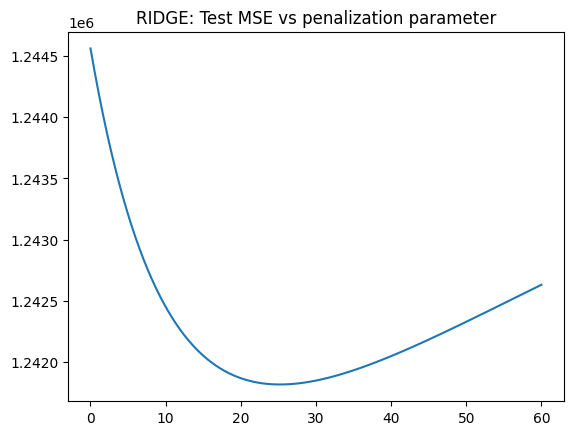

In [5]:
datapath = '/Users/zhangyuanzhuo/425 ML/College.csv'
data = pd.read_csv(datapath)
# set data and grid:
Y = data['Apps']
X = data.drop('Apps', axis=1)
X['Private'] = X['Private'] == 'Yes'
Y_train = Y[:600]
X_train = X[:600]
Y_test = Y[600:]
X_test = X[600:]
alphas = np.linspace(0.01,60,1000)

# OLS:
reg = LinearRegression().fit(X_train, Y_train)
print('OLS: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))

# LASSO:
reg = LassoCV(cv=20, random_state=0, alphas=alphas).fit(X_train, Y_train)
print('LASSO: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas_, np.mean(reg.mse_path_, axis=1))
plt.title('LASSO: Test MSE vs penalization parameter')
plt.show()

# RIDGE:
reg = RidgeCV(cv=None, alphas=alphas, store_cv_values=True).fit(X_train,Y_train)
print('RIDGE: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas, np.mean(reg.cv_values_, axis=0))
plt.title('RIDGE: Test MSE vs penalization parameter')
plt.show()